In [14]:
import sys

sys.path.insert(0, '../src/etl')

from clean import data_cleaning

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


def build_classifier(x,y, classifier_list,output_path, trail_num=5 ):
    
    
    
    knn_param = list(range(2,50,5))
    dt_param = list(range(5,100,10))
    rf_param = list(range(5,100,10))
    nn_param = list(range(300,800,100))
    svm_param = [10**i for i in range(-3,4)]
    sgd_param = list(range(300,1100,100))
    l_param = [10**i for i in range(-3,4)]
    

    print('Start to build the classifier and tune the parameter')

    result = pd.DataFrame(columns =['trail','classifier','parameter','train_acc','test_acc','train_f1','test_f1'])

    for t in range(trail_num):
        #train test split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

        #KNN
        if 'knn' in classifier_list:
            print("Start KNN")
            #tune the parameter
            for i in knn_param:

                clf = KNeighborsClassifier(n_neighbors=i)
                clf.fit(x_train, y_train)

                #get train score
                y_train_pred = clf.predict(x_train)
                train_sc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred,average='macro')

                #get test score
                y_test_pred = clf.predict(x_test)
                test_sc = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred,average='macro')

                temp = {'trail':t,
                        'classifier':'KNN',
                        'parameter': i,
                        'train_acc':train_sc,
                        'test_acc':test_sc,
                        'train_f1':train_f1,
                        'test_f1':test_f1}
                print(temp)
                result = result.append(temp,ignore_index=True)


        #DecisionTree
        if 'decision tree' in classifier_list:
            print("Start Decision Tree")
            for i in dt_param:
                clf = DecisionTreeClassifier(max_depth= i)
                clf.fit(x_train, y_train)

                 #get train score
                y_train_pred = clf.predict(x_train)
                train_sc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred,average='micro')

                #get test score
                y_test_pred = clf.predict(x_test)
                test_sc = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred,average='micro')

                temp = {'trail':t,
                        'classifier':'Decision Tree',
                        'parameter': i,
                        'train_acc':train_sc,
                        'test_acc':test_sc,
                        'train_f1':train_f1,
                        'test_f1':test_f1}
                print(temp)
                result = result.append(temp,ignore_index=True)

        #Random Forest
        if 'random forest' in classifier_list:
            print("Start Random Forest")
            for i in rf_param:
                clf = RandomForestClassifier(max_depth =i)
                clf.fit(x_train, y_train)

                #get train score
                y_train_pred = clf.predict(x_train)
                train_sc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred,average='macro')

                #get test score
                y_test_pred = clf.predict(x_test)
                test_sc = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred,average='macro')

                temp = {'trail':t,
                        'classifier':'Random Forest',
                        'parameter': i,
                        'train_acc':train_sc,
                        'test_acc':test_sc,
                        'train_f1':train_f1,
                        'test_f1':test_f1}
                print(temp)
                result = result.append(temp,ignore_index=True)


        #neural network
        if 'neural network' in classifier_list:
            print("Start Neural network")
            for i in nn_param:
                clf = MLPClassifier( max_iter=i)
                clf.fit(x_train, y_train)

                #get train score
                y_train_pred = clf.predict(x_train)
                train_sc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred,average='micro')

                #get test score
                y_test_pred = clf.predict(x_test)
                test_sc = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred,average='micro')

                temp = {'trail':t,
                        'classifier':'Neural network',
                        'parameter': i,
                        'train_acc':train_sc,
                        'test_acc':test_sc,
                        'train_f1':train_f1,
                        'test_f1':test_f1}
                print(temp)
                result = result.append(temp,ignore_index=True)
                
                
        #SGD
        if 'sgd' in classifier_list:
            print("Start SGD")
            for i in sgd_param:
                clf = SGDClassifier( max_iter = i)
                clf.fit(x_train, y_train)

                #get train score
                y_train_pred = clf.predict(x_train)
                train_sc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred,average='micro')

                #get test score
                y_test_pred = clf.predict(x_test)
                test_sc = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred,average='micro')

                temp = {'trail':t,
                        'classifier':'SGD',
                        'parameter': i,
                        'train_acc':train_sc,
                        'test_acc':test_sc,
                        'train_f1':train_f1,
                        'test_f1':test_f1}
                print(temp)
                result = result.append(temp,ignore_index=True)
                
        
        #logistic
        if 'logistic' in classifier_list:
            print("Start logistic")
            for i in l_param:
                clf = LogisticRegression( C = i)
                clf.fit(x_train, y_train)

                #get train score
                y_train_pred = clf.predict(x_train)
                train_sc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred,average='micro')

                #get test score
                y_test_pred = clf.predict(x_test)
                test_sc = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred,average='micro')

                temp = {'trail':t,
                        'classifier':'logistic',
                        'parameter': i,
                        'train_acc':train_sc,
                        'test_acc':test_sc,
                        'train_f1':train_f1,
                        'test_f1':test_f1}
                print(temp)
                result = result.append(temp,ignore_index=True)

    print("All Done!")
    result.to_csv(output_path, index = False)
    return result


In [2]:
data_path = '../cleaned_data/system_sysinfo_unique_normalized.csv000'
cl= ['knn','random forest','decision tree','neural network','sgd','logistic']

cleaned_data_path = '../cleaned_data/'
result_path = '../result/classifier_performance.csv'

cl = all_classifier_list

x,y = data_cleaning(data_path,cleaned_data_path,100)
r =  build_classifier(x,y,cl,result_path,trail_num =1)





read data successfully
clean data successfully
get features successfully
Start to build the classifier and tune the parameter
Start KNN
{'trail': 0, 'classifier': 'KNN', 'parameter': 2, 'train_acc': 0.5893740701013805, 'test_acc': 0.1747743317761933, 'train_f1': 0.5424013672477519, 'test_f1': 0.12263677617378237}
{'trail': 0, 'classifier': 'KNN', 'parameter': 7, 'train_acc': 0.44192242482959065, 'test_acc': 0.2767026096730006, 'train_f1': 0.29360537357076477, 'test_f1': 0.13470870096889864}
{'trail': 0, 'classifier': 'KNN', 'parameter': 12, 'train_acc': 0.4076502543164596, 'test_acc': 0.3122475501387377, 'train_f1': 0.21440839537924647, 'test_f1': 0.1291148470726453}
{'trail': 0, 'classifier': 'KNN', 'parameter': 17, 'train_acc': 0.39417321199958477, 'test_acc': 0.3271047732780724, 'train_f1': 0.17804113691638357, 'test_f1': 0.11923620570213193}
{'trail': 0, 'classifier': 'KNN', 'parameter': 22, 'train_acc': 0.3884467665478703, 'test_acc': 0.3389413789469987, 'train_f1': 0.157319380715

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'trail': 0, 'classifier': 'logistic', 'parameter': 0.001, 'train_acc': 0.3680149475796685, 'test_acc': 0.3627550841206842, 'train_f1': 0.36801494757966857, 'test_f1': 0.36275508412068425}


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'trail': 0, 'classifier': 'logistic', 'parameter': 0.01, 'train_acc': 0.3718037438150929, 'test_acc': 0.3679533560465035, 'train_f1': 0.3718037438150929, 'test_f1': 0.3679533560465035}


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'trail': 0, 'classifier': 'logistic', 'parameter': 0.1, 'train_acc': 0.3727552679838068, 'test_acc': 0.3695339116996242, 'train_f1': 0.3727552679838068, 'test_f1': 0.36953391169962424}


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'trail': 0, 'classifier': 'logistic', 'parameter': 1, 'train_acc': 0.37268606622608214, 'test_acc': 0.3692529240279583, 'train_f1': 0.37268606622608214, 'test_f1': 0.3692529240279583}


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'trail': 0, 'classifier': 'logistic', 'parameter': 10, 'train_acc': 0.3722708556797343, 'test_acc': 0.36848020793087705, 'train_f1': 0.3722708556797343, 'test_f1': 0.368480207930877}


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'trail': 0, 'classifier': 'logistic', 'parameter': 100, 'train_acc': 0.37232275699802775, 'test_acc': 0.36876119560254295, 'train_f1': 0.3723227569980278, 'test_f1': 0.36876119560254295}
{'trail': 0, 'classifier': 'logistic', 'parameter': 1000, 'train_acc': 0.37303207501470537, 'test_acc': 0.36932317094587475, 'train_f1': 0.37303207501470537, 'test_f1': 0.36932317094587475}
All Done!


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

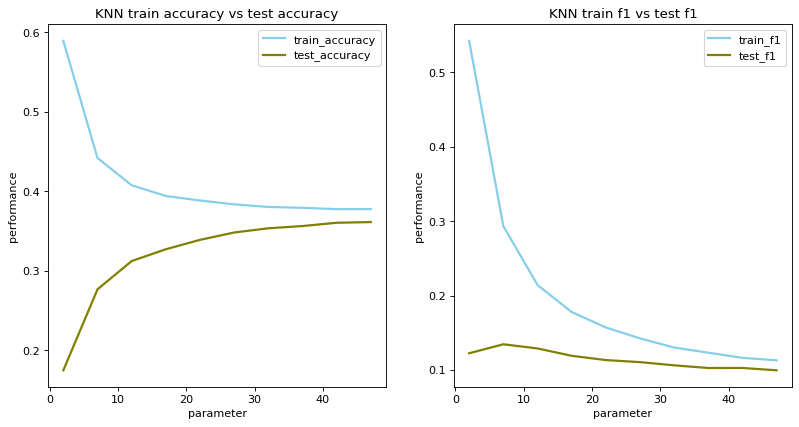

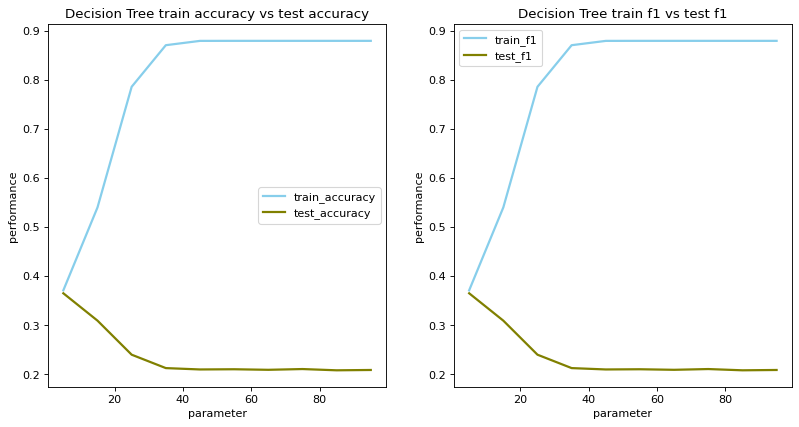

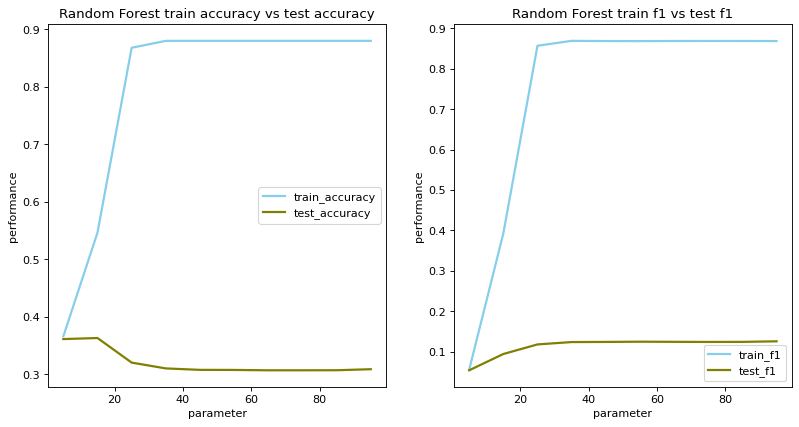

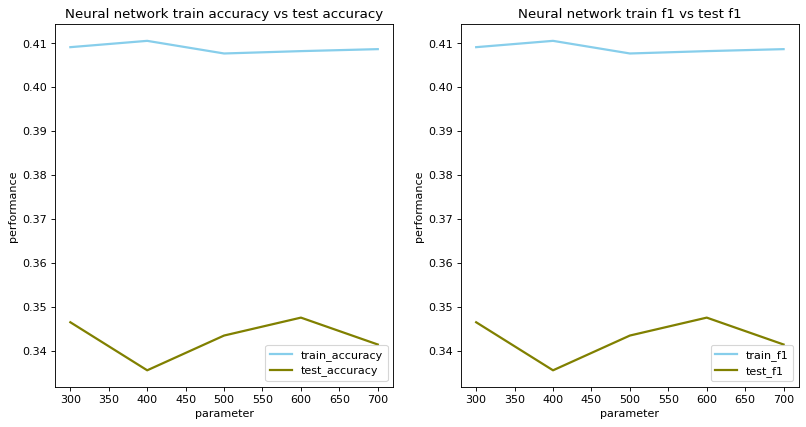

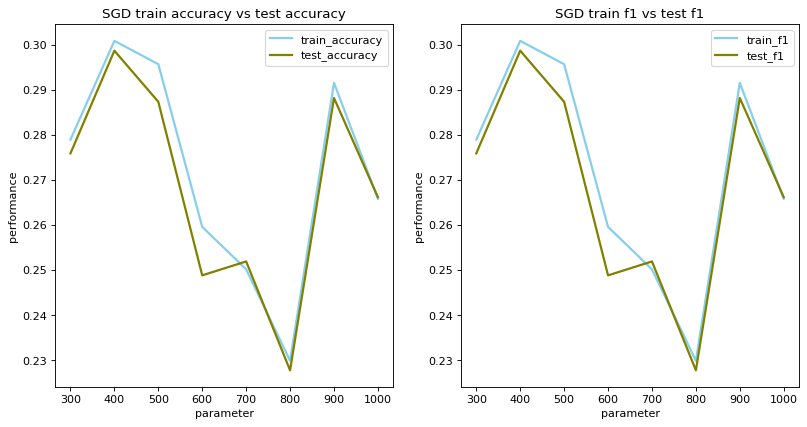

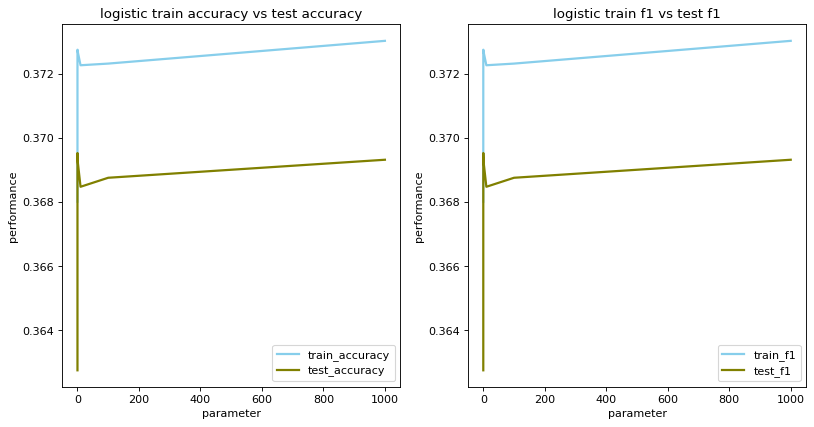

In [25]:
for i in r.classifier.unique():
    temp = r[r.classifier== i]
    
    figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(1, 2, 1)
    plt.plot( 'parameter', 'train_acc', data=temp, marker='', color='skyblue', linewidth=2,label = "train_accuracy")
    plt.plot( 'parameter', 'test_acc', data=temp, marker='', color='olive', linewidth=2,label = "test_accuracy")
    plt.title(i+" train accuracy vs test accuracy")
    plt.xlabel("parameter")
    plt.ylabel("performance")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot( 'parameter', 'train_f1', data=temp, marker='', color='skyblue', linewidth=2,label = "train_f1")
    plt.plot( 'parameter', 'test_f1', data=temp, marker='', color='olive', linewidth=2,label = "test_f1")
    plt.title(i+" train f1 vs test f1")
    plt.xlabel("parameter")
    plt.ylabel("performance")
    plt.legend()

    plt.show()

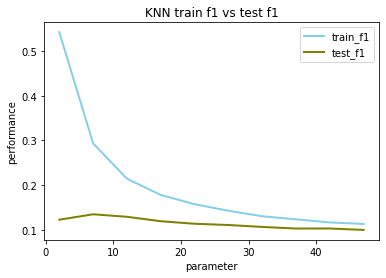